In [24]:
#1. Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
#2.Loading Dataset 

df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
#3. Checking Dataset Shape and Info 

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [30]:
#4.Checking Null Values

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [32]:
#5. Drop Rows with Null Values

df = df.dropna()
df.shape


(9360, 13)

In [34]:
#🧹 DATA CLEANING & TYPE FIXING

In [36]:
#6. Cleaning the Size Column

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M','')) * 1000
    elif 'k' in size:
        return float(size.replace('k',''))
    else:
        return np.nan
df['Size'] = df['Size'].apply(convert_size)


In [38]:
#7. Convert Reviews to Numeric

df['Reviews'] = pd.to_numeric(df['Reviews'])

In [41]:
#8. Clean Installs Column

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype(int)


In [45]:
#9. Clean Price Column

df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)


In [47]:
#✅ SANITY CHECKS

In [49]:
#10. Rating Range (1–5)

df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

In [51]:
#11. Reviews ≤ Installs

df = df[df['Reviews'] <= df['Installs']]

In [55]:
#12. Free Apps Price Check

df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]

In [57]:
#📊 UNIVARIATE ANALYSIS

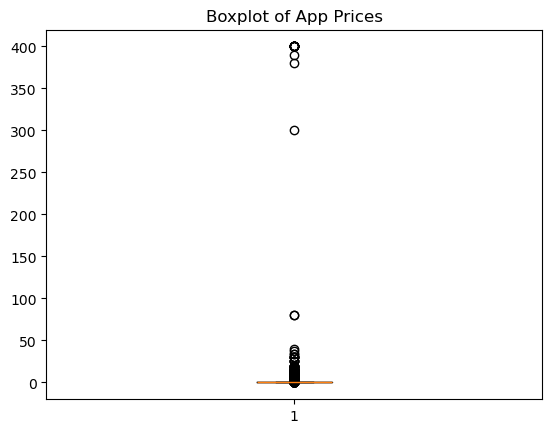

In [59]:
#13. Boxplot – Price

plt.boxplot(df['Price'])
plt.title("Boxplot of App Prices")
plt.show()


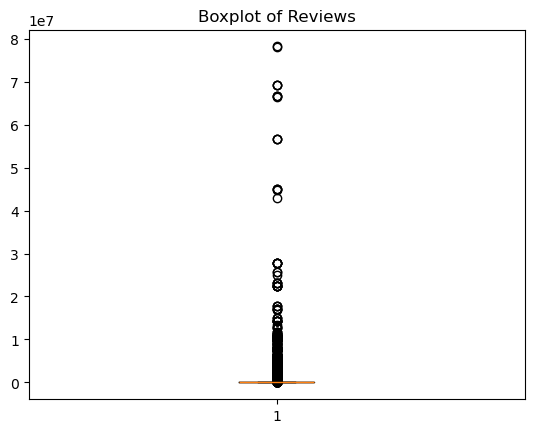

In [63]:
#14. Boxplot – Reviews

plt.boxplot(df['Reviews'])
plt.title("Boxplot of Reviews")
plt.show()


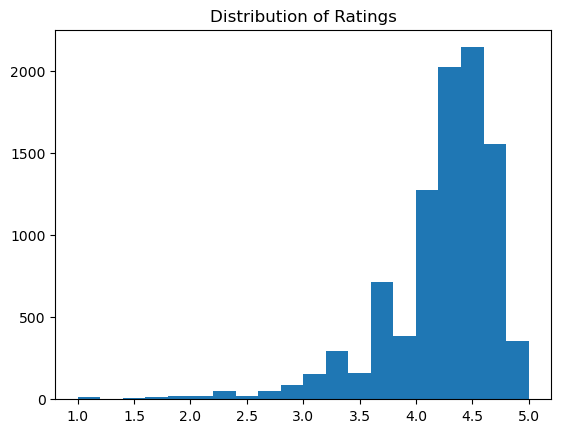

In [65]:
#15.Histogram – Rating

plt.hist(df['Rating'], bins=20)
plt.title("Distribution of Ratings")
plt.show()


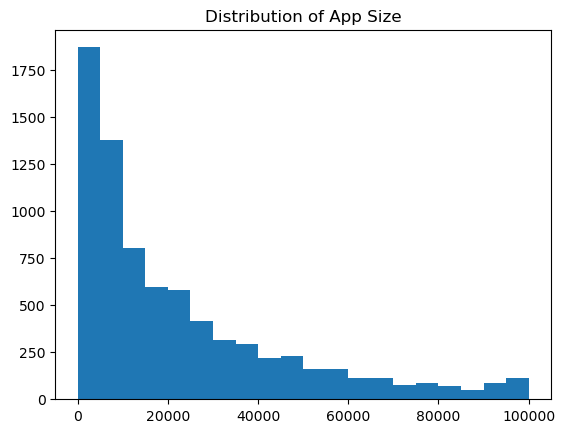

In [67]:
#16 Histogram – Size

plt.hist(df['Size'], bins=20)
plt.title("Distribution of App Size")
plt.show()


In [69]:
#🚨 OUTLIER TREATMENT

In [71]:
#17. Price Outliers (>200)

df = df[df['Price'] <= 200]

In [73]:
#18. Reviews Outliers (>2M)

df = df[df['Reviews'] <= 2000000]

In [75]:
#19. Installs Outliers using Percentile

df['Installs'].quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])
threshold = df['Installs'].quantile(0.95)
df = df[df['Installs'] <= threshold]


In [77]:
#🔁 BIVARIATE ANALYSIS

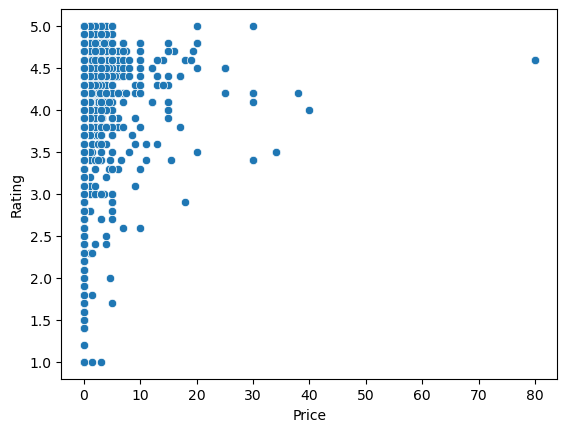

In [79]:
#20. Rating vs Price

sns.scatterplot(x='Price', y='Rating', data=df)
plt.show()

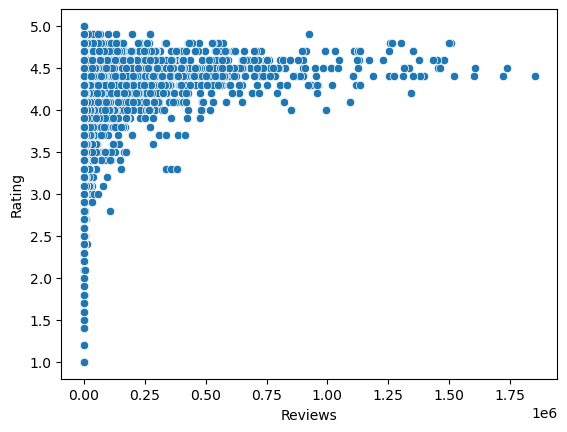

In [81]:
#21. Rating vs Reviews

sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.show()


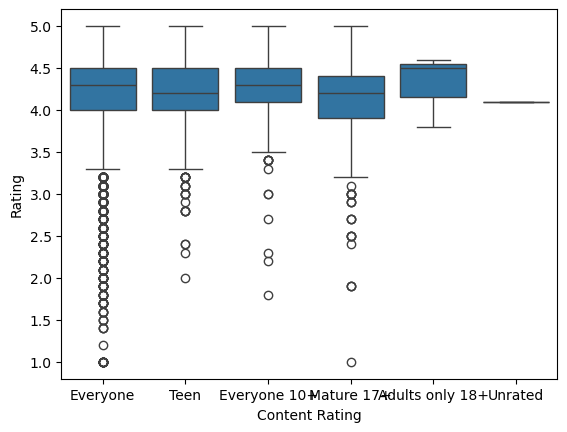

In [83]:
#22. Rating vs Content Rating 

sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.show()


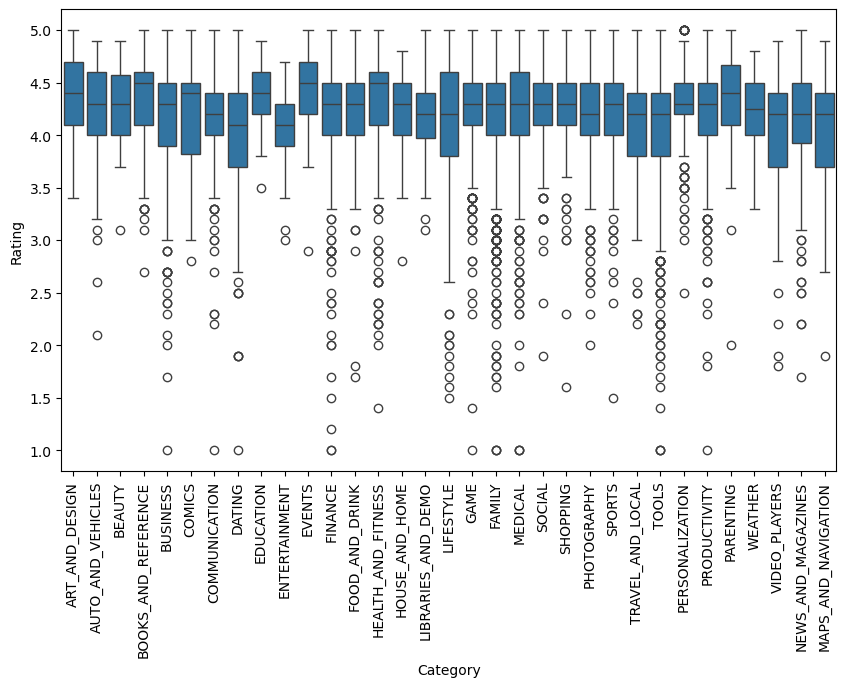

In [87]:
#23. Rating vs Category

plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.show()


In [89]:
#🧠 DATA PREPROCESSING

In [91]:
#24. Create inp1 & Log Transform 

inp1 = df.copy()
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])


In [96]:
#25. Drop Irrelevant Columns

inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)

In [98]:
#26. Dummy Encoding

inp2 = pd.get_dummies(inp1, drop_first=True)


In [100]:
#🤖 MODEL BUILDING

In [102]:
#27. Train-Test Split

df_train, df_test = train_test_split(inp2, test_size=0.3, random_state=42)

In [104]:
#28. Separate X & y

X_train = df_train.drop('Rating', axis=1)
y_train = df_train['Rating']
X_test = df_test.drop('Rating', axis=1)
y_test = df_test['Rating']


In [122]:
#checking null values (new null values were introduced during data preprocessing)

X_train.isnull().sum().sum()


0

In [126]:
#Locating null values in table

X_train.isnull().sum().sort_values(ascending=False).head(10)

Reviews                                       0
Genres_Lifestyle;Education                    0
Genres_Food & Drink                           0
Genres_Health & Fitness                       0
Genres_Health & Fitness;Action & Adventure    0
Genres_Health & Fitness;Education             0
Genres_House & Home                           0
Genres_Libraries & Demo                       0
Genres_Lifestyle                              0
Genres_Lifestyle;Pretend Play                 0
dtype: int64

In [114]:
# Combine X and y temporarily
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Drop NaNs
train_data = train_data.dropna()
test_data = test_data.dropna()

# Separate again
X_train = train_data.drop('Rating', axis=1)
y_train = train_data['Rating']

X_test = test_data.drop('Rating', axis=1)
y_test = test_data['Rating']


In [116]:
#checking remaining null values

X_train.isnull().sum().sum()

0

In [118]:
#29. Linear Regression Model 

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [128]:
#30. R² Score (Train)

train_pred = model.predict(X_train)
r2_score(y_train, train_pred)


0.16606505610639233

In [130]:
#31. Test R² Score

test_pred = model.predict(X_test)
r2_score(y_test, test_pred)


0.11614426445790271